In [2]:
import numpy as np
import open3d as o3d


def generate_pcd_from_stl(path):
    mesh = o3d.io.read_triangle_mesh(path)
    pcd = mesh.sample_points_uniformly(number_of_points=500)
    return pcd

def convert_pcd_to_numpy(pcd):
    return np.asarray(pcd.points)

pcd = generate_pcd_from_stl('figures/klods.stl')
o3d.visualization.draw_geometries([pcd])

pcd_np = convert_pcd_to_numpy(pcd)

In [34]:
from sklearn.manifold import Isomap

# Create an instance of Isomap
isomap = Isomap(n_components=10)

# Fit the Isomap model to the data
manifold = isomap.fit_transform(pcd_np)

# Access the learned manifold coordinates
manifold_x = manifold[:, 0]
manifold_y = manifold[:, 1]


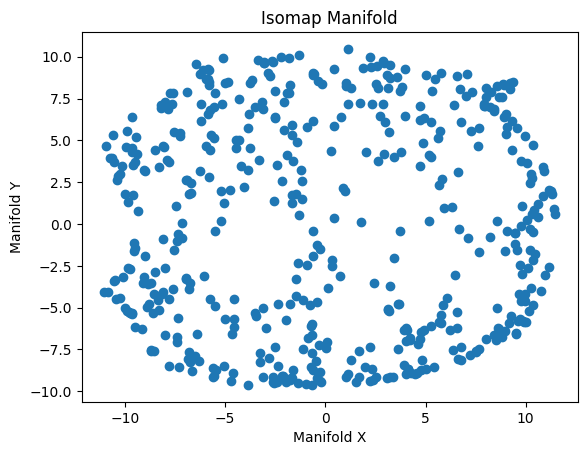

In [35]:
import matplotlib.pyplot as plt

# Create a scatter plot of the manifold coordinates
plt.scatter(manifold_x, manifold_y)
plt.xlabel('Manifold X')
plt.ylabel('Manifold Y')
plt.title('Isomap Manifold')
plt.show()


In [17]:
pcd.normals = o3d.utility.Vector3dVector(np.zeros(
    (1, 3)))  # invalidate existing normals

pcd.estimate_normals()
pcd.orient_normals_consistent_tangent_plane(100)
o3d.visualization.draw_geometries([pcd], point_show_normal=True)



In [33]:
radii = [0.005, 1, 2, 4]
rec_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
    pcd, o3d.utility.DoubleVector(radii))
o3d.visualization.draw_geometries([pcd, rec_mesh])

ModuleNotFoundError: No module named 'geomstats.manifolds'